<a href="https://colab.research.google.com/github/LucasA0911/Analise-de-dados/blob/main/Estudo_de_an%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name = 'clientes') ##df = DataFrame, ele transforma os dados tem tabelas
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'vendas')
dfPag = pd.read_excel('caso_estudo.xlsx', sheet_name = 'pagamentos')

# Analise Preliminar

In [ ]:
dfClientes.sample(5) ## pode ser usado no lugar do sample(simplifica os dados na quantidade que você quiser) o head para os primeiros, ou tail para os ultimos

,id,nome,sexo,dt_nasc
916,917,Eduarda Lima,F,10/28/1950
431,432,André Santos,M,6/25/1988
770,771,Renan Pereira,M,2/16/1948
414,415,Nicolash Pinto,M,6/22/1989
275,276,Luiz Oliveira,M,12/9/1960


In [ ]:
dfClientes.isna().sum() ## melhor forma de saber a quantidade de dados nulos em um conjunto de dados

,0
id,0
nome,4
sexo,4
dt_nasc,4


In [ ]:
dfClientes[dfClientes.isna().T.any()] ##os [] é a forma de criar um filtro, e precisa do Transpostas "T" e o Any para que funcione da forma correta

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [ ]:
dfClientes.sexo.unique() ##aqui o unique busca os caracteres unicos desta coluna, o que também é uma forma de localizar dados nulos ou incorretos, antes de iniciar a limpeza dos dados.

array(['F', 'M', nan], dtype=object)

In [ ]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<Axes: >

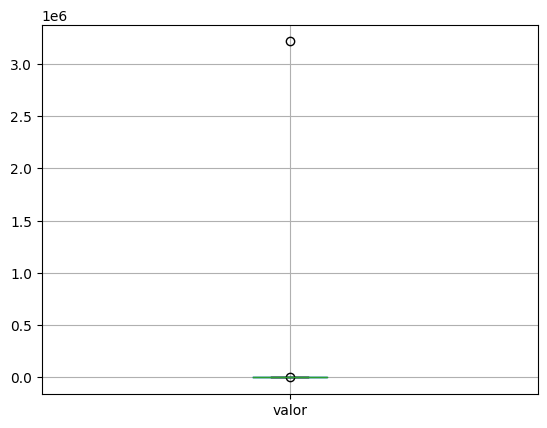

In [ ]:
dfProdutos.boxplot(column = ['valor']) ##o boxplot é uma ferramenta gráfica utilizada para ilustrar um conjunto de dados.

O Box Plot, também chamado diagrama de caixa, é uma ferramenta gráfica utilizada para ilustrar um conjunto de dados. Por meio dele, é possível visualizar a distribuição de dados com base em cinco estatísticas:

    o mínimo;

    o primeiro quartil (Q1);

    a mediana;

    o terceiro quartil (Q3);

    o máximo.

Esses valores também são conhecidos como resumo dos cinco números.

Ele também pode informar os valores discrepantes (outliers) dos dados, oferecendo uma medida complementar para o desenvolvimento de perspectivas sobre as informações passadas através dos dados.

Além disso, o Box Plot pode informar a posição dos dados, sua simetria, dispersão, cumprimento da cauda de distribuição e se estão ou não distorcidos.

No gráfico do Box Plot, a haste vertical é interpretada de baixo para cima, sendo que a parte inferior indica o mínimo e a superior indica o máximo, sempre desconsiderando possíveis outliers.

O retângulo central da haste possui três linhas que estão na horizontal: a linha de baixo, representada pelo contorno externo inferior do retângulo, indica o primeiro quartil. A linha de cima, que é o contorno externo superior do retângulo, indica o terceiro quartil. Já a linha interna indica a mediana ou o chamado segundo quartil.

Valores discrepantes, outliers e extremos são representados por asteriscos ou pontos, e indicam pontos atípicos no gráfico.

<Axes: >

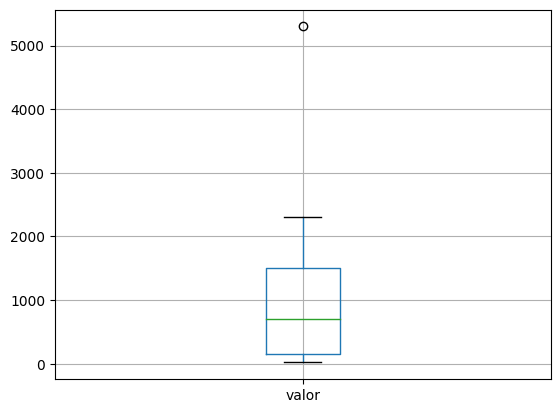

In [ ]:
dfProdutos[dfProdutos.valor < 3000000].boxplot(column = ['valor']) ## aqui foi aplicado um filtro no boxplot eliminando o valor de 3M que estava no outlier. Importante ressaltar que mesmo existindo um outlier aqui, é necessario avaliar se ele faz sentido neste contexto.

Após identificar o valor problematico, é importante entender o motivo dele estar lá, procurando em outras bases de dados, ou falando com uma pessoa que possa saber o motivo da discrepância. Nesse caso podemos analisar a planilha de vendas.

In [ ]:
dfProdutos[dfProdutos.valor > 3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


In [ ]:
dfVendas[dfVendas.id_produto == 10].count() ##aqui novamente estamos fazendo um filtro para identificar quantas vezes o produto discrepante foi vendido atravez do id do produto, e tentar achar o valor correto, e o item correto.

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [ ]:
dfVendas.describe() ##Describe pode ser utilizado para descrever o tipo do dado, e também pode ser utilizado para entender a quantidade maxima e minima daquele dado.

,id,id_cliente,id_loja,id_produto,dt_venda
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,500.763667,4.538333,4.435000,2019-05-17 17:48:28.799999744
min,1.000000,1.000000,1.000000,1.000000,2018-01-04 00:00:00
25%,750.750000,254.750000,2.000000,3.000000,2018-09-09 00:00:00
50%,1500.500000,503.500000,4.000000,3.000000,2019-05-20 00:00:00
75%,2250.250000,742.000000,7.000000,6.000000,2020-01-29 06:00:00
max,3000.000000,1000.000000,10.000000,10.000000,2020-09-27 00:00:00
std,866.169729,285.322282,2.922221,2.511018,NaN


Ex: podemos saber que a quantidade maxima de vendas foi de 3000 e o minimo de 1, também é posivel identificar a quantidade maxima e minima de lojas, produtos e clientes.

# Data Cleanning

Após identificar as discrepância, é a hora de limpar os dados.

Nesta etapa vamos:


*   Lidar com os dados nulos.
*   Buscar outliers e tratativas.
*   Buscar incosistencias entre bases de dados.
*   Buscar dados duplicados.
*   Tratar dados como as datas.
*   Identificar chaves primárias (Dado único que será referenciado em outras bases de dados).



## Dados nulos

utilizar o ***isnull()*** para localizar os dados nulos

In [ ]:
dfClientes.loc[dfClientes.nome.isnull(),'nome'] = 'Sem Nome' ##o comando loc é utilizado de forma similar a uma busca em um array ou em um objeto json [index]
dfClientes.loc[dfClientes.sexo.isnull(),'sexo'] = 'O' ##Outros
dfClientes.loc[dfClientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2024' ## uma dica boa é utilizar uma data de nascimento em que sabemos que é impossivel a pessoa ter realizado a compra, neste caso a pessoa que realizou a compra teria menos de 1 ano, na data em que fiz esta analize

Este trecho de código esta utilizando o filtro para substituir o dado nulo para um dado que seja possivel localizar depois

In [ ]:
dfClientes.loc[[269,287], :] ## utilizando o loc para procurar no index clientes especificos

,id,nome,sexo,dt_nasc
269,270,Sem Nome,M,1/1/2024
287,288,Victor Ribeiro,O,12/17/1974


Aqui temos um exemplo de como ficaria a tabela após aplicar as correçoes com os filtros

In [ ]:
dfClientes.isnull().sum() ## utilizando o isnull e o sum para ver a soma de dados nulos em um conjunto de dados

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

Confirmando que não há mais dados nulos na tabela

## Outliers

Outliers são apenas dados númericos, que são localizados atravez do comando boxplot().

In [ ]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


é importante ressaltar que não localizando o valor real do produto dentro dos dados disponiveis, procurar uma pessoa que saiba qual é o nome do produto e o seu real valor.

In [ ]:
dfProdutos.loc[9, 'valor'] = dfProdutos.valor[9]/10000 ## Aqui estou substituindo o valor do produto pelo valor que o "analista que tem mais conhecimento" me passou.

<Axes: >

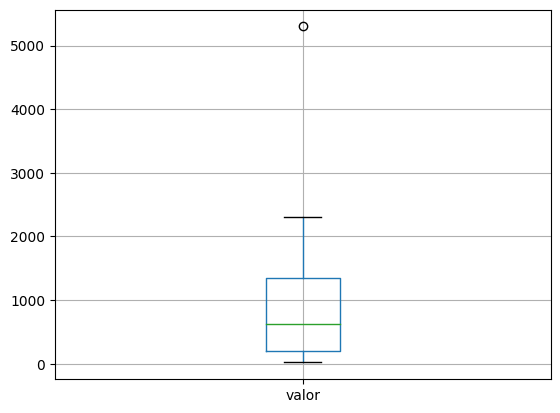

In [ ]:
dfProdutos.boxplot(column=['valor']) ## consultando novamente o boxplot para verificar se esta tudo normalizado.

##Consistência

Garantir que as tabelas conseguem conversar uma com a outra, garantindo que não tenha nenhum dado "ruim" ou discrepântes

Utilizaremos muito o ***isin()***

In [ ]:
dfVendas.id_cliente.isin(dfClientes.id).any() ## é possivel utilizar o "any()" para verificar se os dados estão iguais


True

In [ ]:
~dfVendas.id_cliente.isin(dfClientes.id).any() ## também é possivel fazer o oposto utilizando o simbolo de not (~)

False

Lembrando que o ***any()*** devolve o valores booleanos.

In [ ]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)] ##também é possivel aplicar um filtro para vizualizar a tabela.

,id,id_cliente,id_loja,id_produto,dt_venda


In [ ]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [ ]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)].count() ##também é possivel utilizar o "count" para verificar a contagem de erros. Lembrando que o "count()" trás valores de "0" para falso e "1" para verdadeiro. Caso tivesse algum valor discrepante, ele iria trazer o resultado da soma dos verdadeiros.

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

Aqui basicamente estamos cruzando os dados de id entre a tabela de vendas e as demais para localizar erros.

Nesse caso como não tem nenhum erro, logo ele não vai localizar nenhuma discrepância.

In [ ]:
dfPag[~dfPag.id_venda.isin(dfVendas.id)] ##Verificando se existe algum id de pagamento que não está na tabela de vendas

,id,id_venda,dt_pgto


In [ ]:
dfVendas[~dfVendas.id.isin(dfPag.id_venda)].count() ##Verificando quantas vendas não tiveram pagamentos

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

##Dados Duplicados

Verificando os dados duplicados.

Aqui utilizaremos principalmente a função duplicated()

In [ ]:
dfClientes[dfClientes.nome.duplicated()] ##Verificando dados duplicados pelo nome do cliente

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [ ]:
dfClientes[dfClientes.nome == 'Anna Melo'] ##Verificando se as colunas estão identicas

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [ ]:
dfClientes.duplicated().sum() ##Fazendo a soma do total de duplicatas com o id

0

In [ ]:
dfClientes.drop('id',axis=1).duplicated().sum() ##Verificando a soma do total de duplicatas sem o id, porque o id pode "sujar" a analise pois o cadastro pode ter sido realizado pela mesma pessoa em momentos diferentes. Gerando ids de clientes diferentes

0

o comando ***drop()*** elimina uma coluna ou linha selecionada.

Sua sintaxe é *drop*(**'nome da coluna ou linha'**, *axis* = (*numero que representa linha ou coluna*.(**0 para linha**, **1 para coluna**)

Caso os dados do cliente esteja duplicado, é interessante agrupar os dados dele, para que se possa ter por exemplo uma noção de quanto o cliente realmente gastou com a loja.

In [ ]:
dfVendas[dfVendas.drop('id', axis=1).duplicated()] ##filtrando quantas vendas repetidas foram realizadas, sem a coluna id.

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


Quando se utiliza o filtro desta forma ele retorna apenas o ultimo registro duplicado.

Para se ter uma noção do total é interessante utilizar o ***sum()*** sem o filtro

In [ ]:
dfVendas[(dfVendas.id_cliente == 559) & (dfVendas.id_loja == 2) & (dfVendas.id_produto == 5)] ##Verificando os registros duplicados

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


Outra forma é utilizar um filtro completo para ver todas as duplicatas que foram localizadas.


A menos que haja alguma forma de cruzar os dados da quantidade de produtos comprados pela pessoa com a quantidade que há em estoque no exato momento da compra, é impossivel determinar se foi comprado mais de um produto pela mesma pessoa no mesmo dia.

## Formato de dados

Alterar o formato dos dados.

A função utilizada será o ***pd.to_datetime()*** para alterar a data

A sintaxe da função é:

*pd.todatetime*(**coluna a ser alterada**, *format* = **formato**(**ex:** *%d/%m/y* = *dd-mm-aaaa*)

[documentação](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [ ]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format ='%m/%d/%Y') ## alterando de DD/MM/AAAA para AAAA-MM-DD
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


##Indexes

In [ ]:
dfClientes = dfClientes.set_index('id') ## transforma o id em index
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPag = dfPag.set_index('id')

In [ ]:
dfVendas

,id_cliente,id_loja,id_produto,dt_venda
id,,,,
1,393,9,3,2018-01-04
2,417,9,3,2018-01-04
3,374,7,8,2018-01-04
4,59,4,3,2018-01-05
5,18,9,1,2018-01-05
...,...,...,...,...
2996,671,3,7,2020-09-27
2997,586,8,3,2020-09-27
2998,731,2,4,2020-09-27


#Data Fusion

Quando for realizar a fusão dos dados, é importante verificar qual é a tabela que possui mais granularidade de informações.

Utilizaremos a função join() para executar esta tarefa.

Sua sintaxe é:

*Tabela principal*.*join*(**tabela que irá complementar as info**, *on* = **'onde as informações irão se mesclar'**)

[documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)

In [ ]:
dfVendas.join(dfClientes, on = 'id_cliente') ## Mesclando as tabelas

,id_cliente,id_loja,id_produto,dt_venda,nome,sexo,dt_nasc
id,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31
3,374,7,8,2018-01-04,André Alves,M,1962-08-03
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15
...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04


Obsserve que agora a tabela vendas contem as informações de Nome, Sexo e Data de Nascimento

In [ ]:
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on = 'id_cliente') ## Adicionando um prefixo

A função add.prefix() serve para adicionar um prefixo as novas colunas, sendo pussivel identificar de qual tabela aquelas informações estão vindo.


É importante salvar a nova tabela em uma nova váriavel.

Neste caso a variavel é **'df'**

In [ ]:
df = df.join(dfLojas.add_prefix('loja_'), on = 'id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on = 'id_produto')

In [ ]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [ ]:
dfClientes.loc[393]

nome             Gustavo Silva
sexo                         M
dt_nasc    1950-01-04 00:00:00
Name: 393, dtype: object

In [ ]:
df = df.join(dfPag.set_index('id_venda')) ##Recebendo as datas de pagamento

In [ ]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


NaT = Not a Time ou Não é um registro de tempo.

In [ ]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

#**Criando novos dados (Feature Engineering)**



###***Faça Perguntas que você gostaria de responder!***

Quais Lojas mais vendem?

Quais Produtos mais vendem?

Quais lojas geram maior receita?

Quais Produtos geram maior receita?

Existe um cliente que compre mais?

Existe alguma relação entre loja e cliente?

Qual o tempo médio entre compra e pagamento?
(tempo_pg)

Existe alguma loja em que esse tempo é menor? E produto?

Qual produto gera mais inadimplências?(pg)

Qual loja tem mais inadimplências?

Existe alguma relação entre idade e inadimplência? (cliente_idade)

É possível prever inadimplência através dos dados idade, cidade e produto?

*   Gere novos dados ou transforme!



In [ ]:
df['pg'] = 1 ## Gerando uma nova coluna de pagamentos onde 1 = pago e 0 = inadimplente
df.loc[df.dt_pgto.isnull(), 'pg'] = 0 ## Gerando o dado de inadimplencia
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


Lembrando que a sintaxe da função ***loc[]*** é:

*df*.*loc*[**linha,nome_coluna**]

[documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [ ]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days ## criando a coluna de tempo de pagamento
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


o dt.days é utilizado para retirar a string *(days)*, e deixar apenas o número de dias

In [ ]:
import numpy as np ## importando o numpy
df['cliente_idade'] = np.floor(((pd.to_datetime('today') - df.cliente_dt_nasc).dt.days)/365.25) # criando nova coluna de idade dos clientes
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,30.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,38.0


a função *np.floor()* arredonda para baixo um número float, como pode ser visto nesta [documentação](https://numpy.org/doc/stable/reference/generated/numpy.floor.html)

Já a função np.timedelta64(), é a função que transforma dias em anos, sua sintaxe pode ser conferida nesta [documentação](https://numpy.org/doc/stable/reference/arrays.datetime.html)

# Análises

## Lojas que mais vendem

In [ ]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending = False) ## Agrupando os dados por cidade, e verificando a quantidade de vendas por cidade
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'vendas por loja')

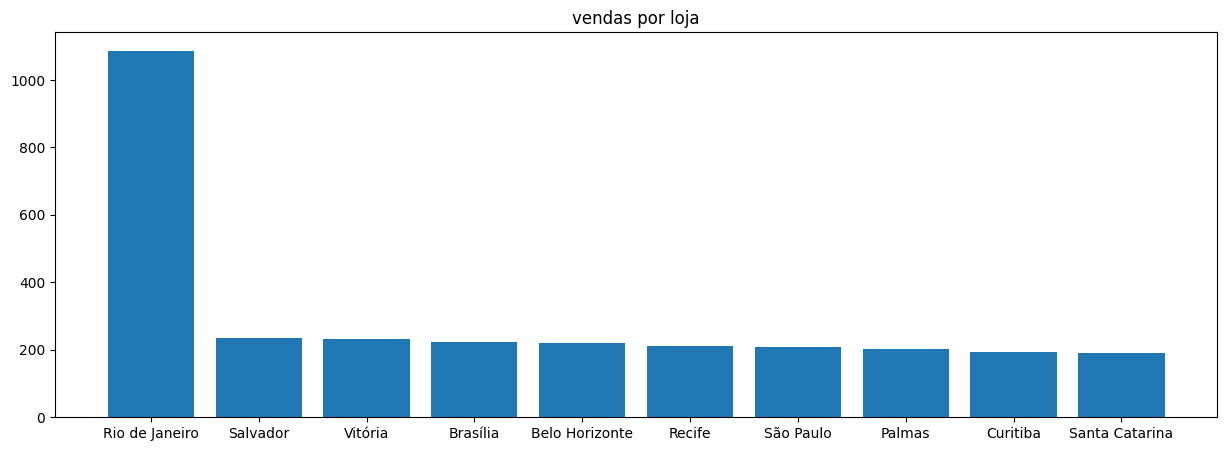

In [ ]:
import matplotlib.pyplot as plt ## importando a biblioteca para gerar os gráficos
plt.figure(figsize=(15,5)) ## criando uma figura de 15x5
plt.bar(graf_dados.index, graf_dados.values) ## Criando um grafico de dados, onde o index são as cidades e os valores são a quantidade de vendas.
plt.title('vendas por loja') ## Titulo do gráfico.

## Produtos que mais vendem

In [ ]:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending = False)
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'vendas por produto')

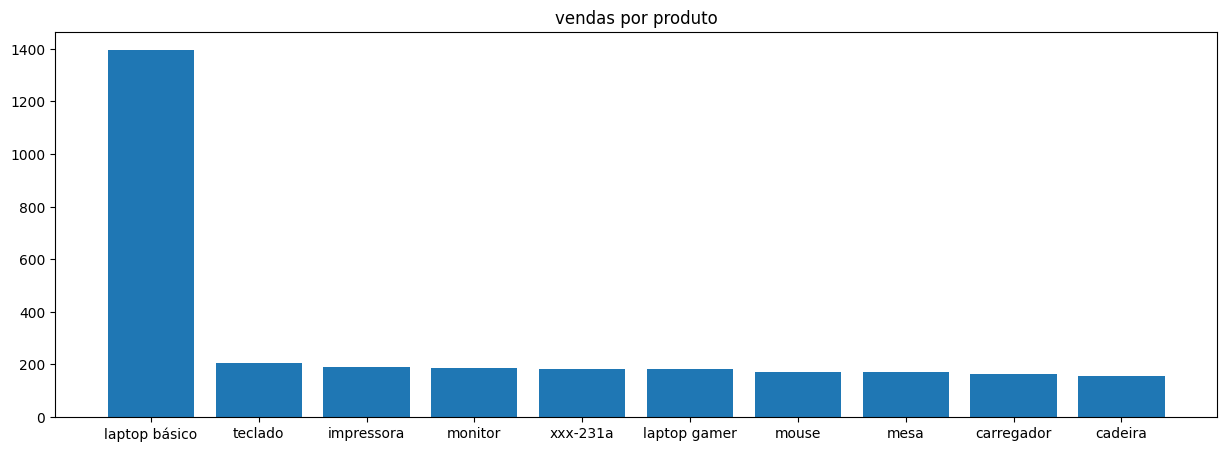

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('vendas por produto')

Os gráficos são feitos utilizando a biblioteca matplot.
É interessante estudar a [documentação](https://matplotlib.org/stable/index.html) para aprender mais sobre as capacidades dessa biblioteca.

## Receita por loja

In [ ]:
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending = False)
graf_dados

loja_cidade
Rio de Janeiro    1.797907e+06
Brasília          3.779836e+05
Belo Horizonte    3.757225e+05
Salvador          3.752382e+05
Vitória           3.655850e+05
São Paulo         3.407579e+05
Recife            3.329236e+05
Palmas            3.168370e+05
Santa Catarina    3.133314e+05
Curitiba          3.032404e+05
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'receita por loja')

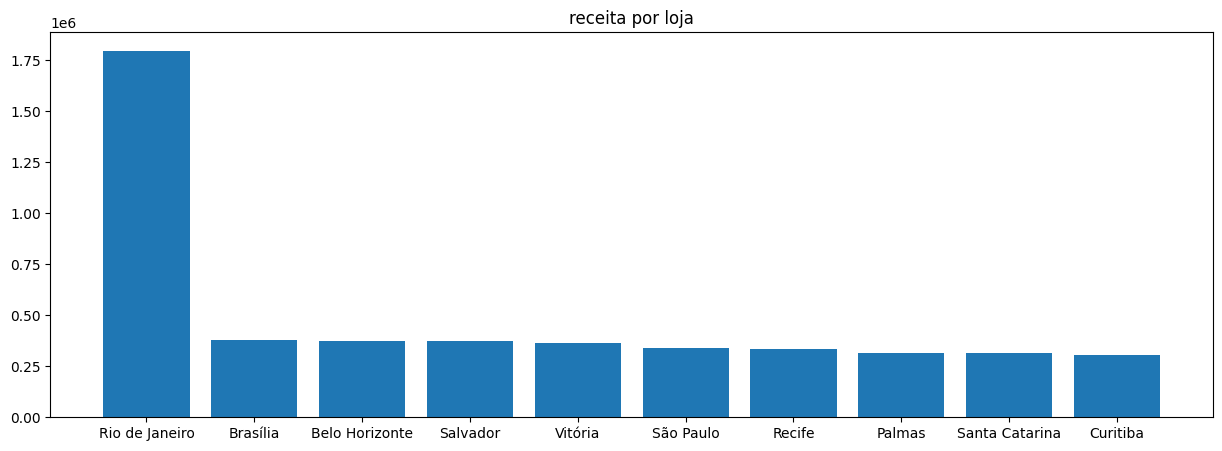

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('receita por loja')

In [ ]:
print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (graf_dados.max(), graf_dados.max()/graf_dados[graf_dados!=graf_dados.max()].mean(), graf_dados[graf_dados!=graf_dados.max()].mean()))

O maior valor é 1797906, sendo 5.22 vezes a média dos demais, que é 344624


Aqui ***(graf_dados.max()/graf_dados[graf_dados!=graf_dados.max()].mean())*** foi realizada uma conta onde pegamos o valor maximo e dividimos pela média.

***!= ***significa diferente

No filtro estamos apenas tirando o valor maximo, que seria do estado do rio e fazendo apenas dos outros estados para sabermos o quantas vezes mais ele é comparado a média dos outros estados

## Receita por produto

In [ ]:
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending = False)
graf_dados

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'receita por produto')

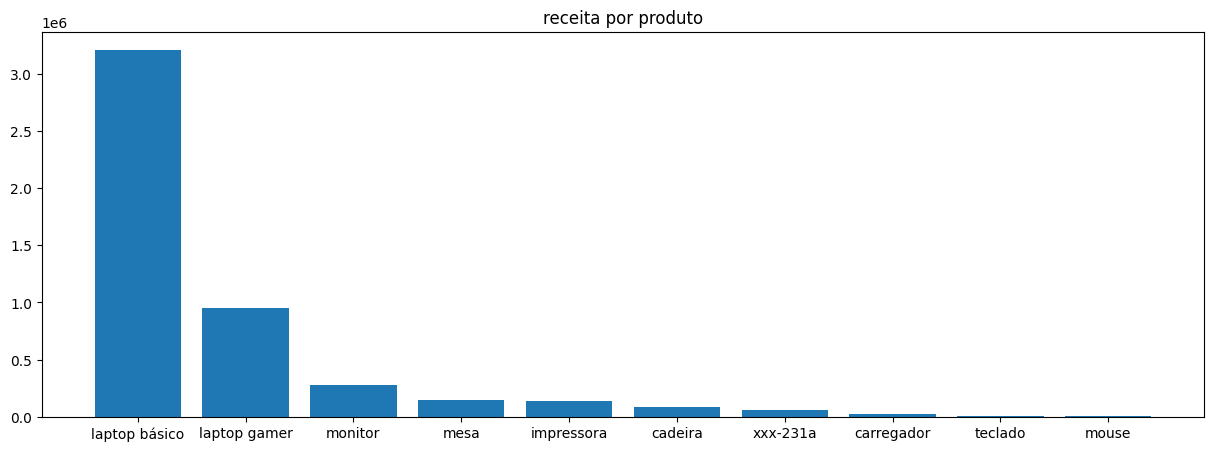

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('receita por produto')

## Subplots

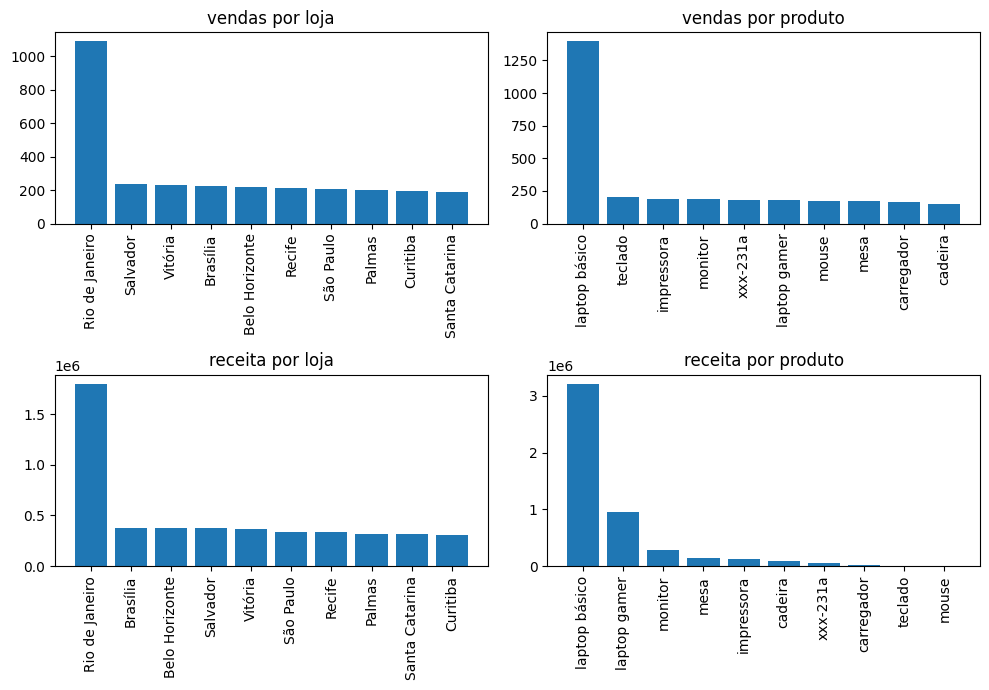

In [ ]:
plt.figure(figsize = (10,7))
plt.subplot(2,2,1)
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('vendas por loja')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('vendas por produto')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('receita por loja')
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('receita por produto')
plt.xticks(rotation = 90)

plt.tight_layout()

## Receita por cliente

In [ ]:
graf_dados = df[['cliente_nome','produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending = False)
graf_dados

cliente_nome
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
                       ...    
Julieta Barros         20.0000
Thaís Pinto            20.0000
Giovana Barbosa        20.0000
Diego Sousa            20.0000
José Pinto             20.0000
Name: produto_valor, Length: 861, dtype: float64

Text(0.5, 1.0, 'receita por cliente')

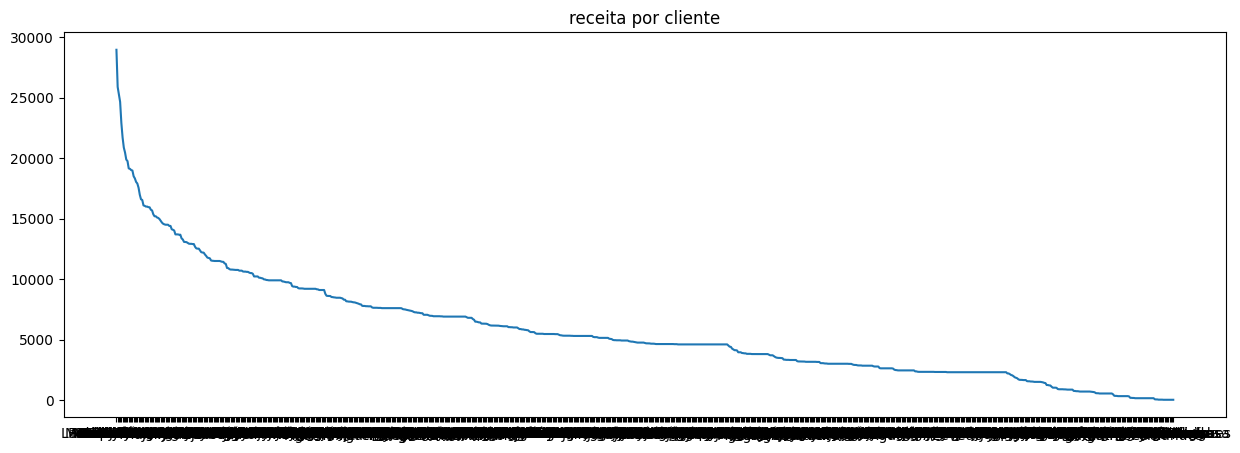

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(graf_dados.index, graf_dados.values)
plt.title('receita por cliente')

Text(0.5, 1.0, 'Receita por Cliente')

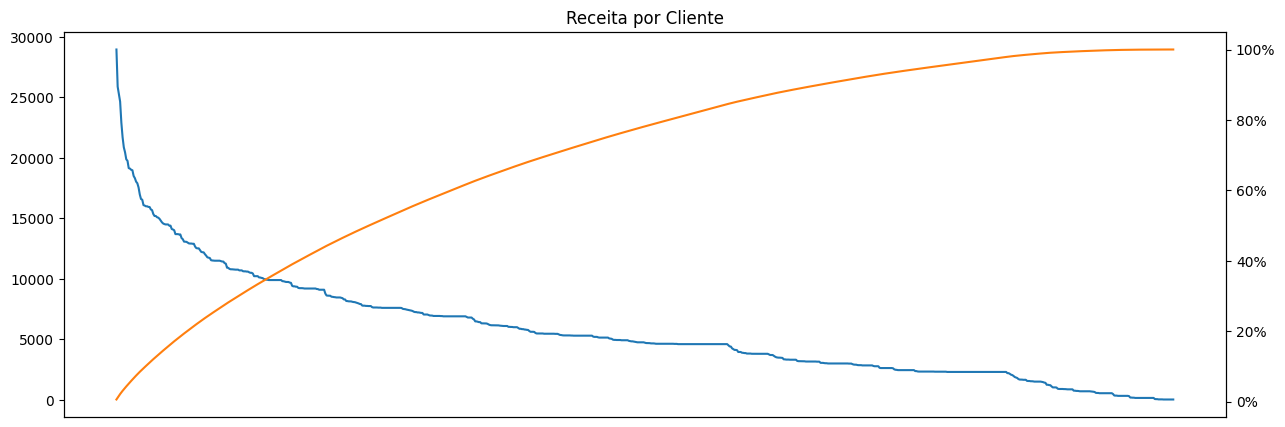

In [ ]:
from matplotlib.ticker import PercentFormatter

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(graf_dados.index, graf_dados.values, color = 'C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color = 'C1')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.title('Receita por Cliente')

In [ ]:
receita_acumulada = graf_dados.cumsum()/graf_dados.sum()
print('O percentual de clientes que compõe 60% da receita é de {:.0f}%'.format(np.floor(receita_acumulada[receita_acumulada<0.60].count()/receita_acumulada.count()*100)))

O percentual de clientes que compõe 60% da receita é de 31%


##Pareto

Text(0.5, 1.0, 'Pareto de Receita por Produto')

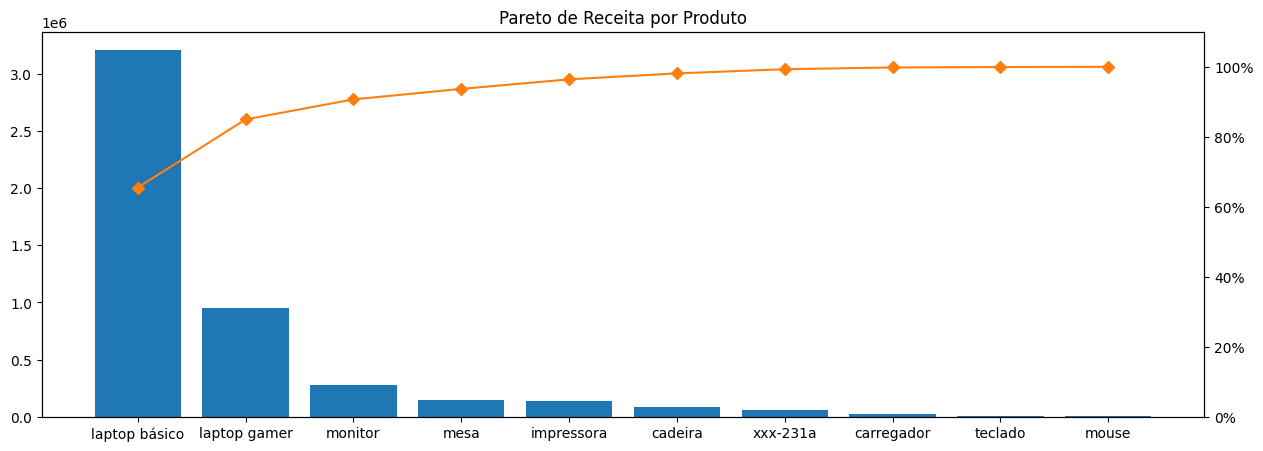

In [ ]:
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending = False)
fig,ax = plt.subplots(figsize=(15,5))
ax.bar(graf_dados.index, graf_dados.values, color = 'C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color = 'C1', marker = 'D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title('Pareto de Receita por Produto')

## Receita combinando produto-loja

In [ ]:
graf_dados = pd.DataFrame(columns = ('loja','produto','receita')) ## Criando um novo data Frame
temp_list = [] ## Criando uma lista temporária para utilizar o append
for cidade in dfLojas.cidade: ## Fazendo um for no data frame lojas e pegando a cidade em que a loja está localizada
  for produto in dfProdutos.produto: ## Fazendo um for no data frame produtos e pegando o nome do produto
    temp_list.append({ ## puxando os dados para dentro de um objeto
        'loja':cidade,
        'produto': produto,
        'receita': df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()
    })
graf_dados = pd.concat([graf_dados, pd.DataFrame(temp_list)], ignore_index = True) ## Concatenando os dados para o data Frame
graf_dados

,loja,produto,receita
0,São Paulo,mouse,300.0000
1,São Paulo,teclado,510.0000
2,São Paulo,laptop básico,223100.0000
3,São Paulo,laptop gamer,63600.0000
4,São Paulo,monitor,30000.0000
...,...,...,...
95,Vitória,impressora,8400.0000
96,Vitória,carregador,2100.0000
97,Vitória,cadeira,5400.0000
98,Vitória,mesa,12040.0000


<Axes: xlabel='produto', ylabel='loja'>

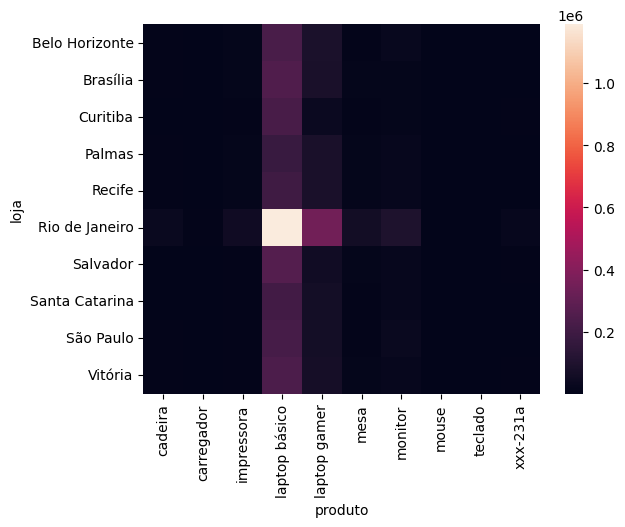

In [ ]:
import seaborn as sns ## importando a biblioteca seaborn
graf_dados = graf_dados.pivot_table(index = 'loja', columns = 'produto', values = 'receita', aggfunc = 'sum') ##Convertendo os dados em uma tabela pivot/dinâmica
sns.heatmap(graf_dados)

In [ ]:
graf_dados = pd.DataFrame(columns = ('loja','produto','receita')) ## Criando um novo data Frame
temp_list = [] ## Criando uma lista temporária para utilizar o append
for cidade in dfLojas.cidade: ## Fazendo um for no data frame lojas e pegando a cidade em que a loja está localizada
  for produto in dfProdutos.produto: ## Fazendo um for no data frame produtos e pegando o nome do produto
    temp_list.append({ ## puxando os dados para dentro de um objeto
        'loja':cidade,
        'produto': produto,
        'receita': df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()
    })
graf_dados = pd.concat([graf_dados, pd.DataFrame(temp_list)], ignore_index = True) ## Concatenando os dados para o data Frame
graf_dados = graf_dados.sort_values('receita', ascending = False)
graf_dados

,loja,produto,receita
12,Rio de Janeiro,laptop básico,1189100.0
13,Rio de Janeiro,laptop gamer,344500.0
62,Salvador,laptop básico,264500.0
72,Brasília,laptop básico,250700.0
92,Vitória,laptop básico,241500.0
...,...,...,...
70,Brasília,mouse,220.0
60,Salvador,mouse,220.0
40,Santa Catarina,mouse,200.0
30,Belo Horizonte,mouse,200.0


In [ ]:
graf_dados['lojaprod'] = graf_dados.loja + ' - ' + graf_dados.produto
graf_dados

,loja,produto,receita,lojaprod
12,Rio de Janeiro,laptop básico,1189100.0,Rio de Janeiro - laptop básico
13,Rio de Janeiro,laptop gamer,344500.0,Rio de Janeiro - laptop gamer
62,Salvador,laptop básico,264500.0,Salvador - laptop básico
72,Brasília,laptop básico,250700.0,Brasília - laptop básico
92,Vitória,laptop básico,241500.0,Vitória - laptop básico
...,...,...,...,...
70,Brasília,mouse,220.0,Brasília - mouse
60,Salvador,mouse,220.0,Salvador - mouse
40,Santa Catarina,mouse,200.0,Santa Catarina - mouse
30,Belo Horizonte,mouse,200.0,Belo Horizonte - mouse


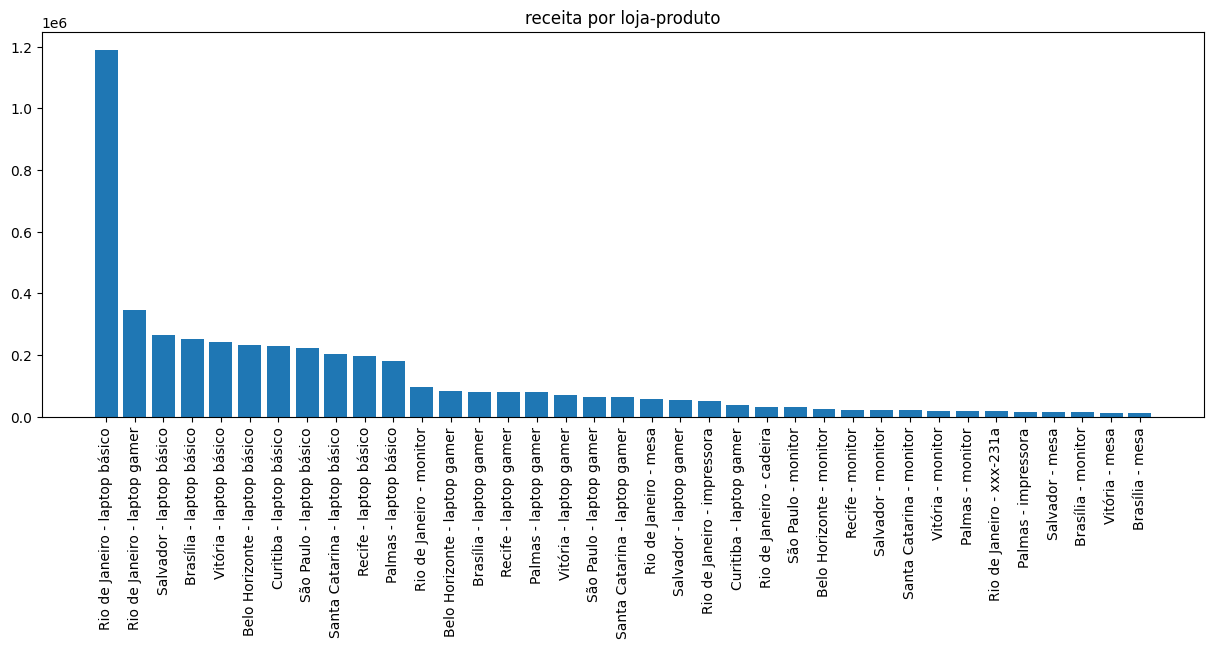

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.lojaprod[graf_dados.receita > 0.01*graf_dados.receita.max()], graf_dados.receita[graf_dados.receita > 0.01*graf_dados.receita.max()])
plt.xticks(rotation = 90)
plt.title('receita por loja-produto')
plt.show()

É interessante estudar a bibioteca gráfica [Plotly](https://plotly.com/python/)

#Analise de tempo

##Tempo médio de pagamento

In [ ]:
df.tempo_pg.mean()

22.47200772200772

Text(0.5, 1.0, 'Boxplot tempo de pagamento')

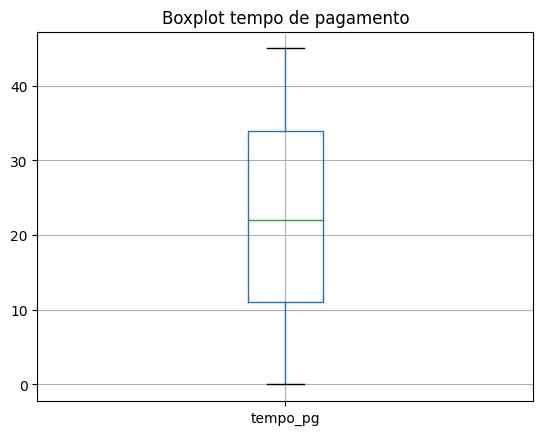

In [ ]:
df.boxplot('tempo_pg')
plt.title('Boxplot tempo de pagamento')

Text(0.5, 1.0, 'Distribuição tempo de pagamento')

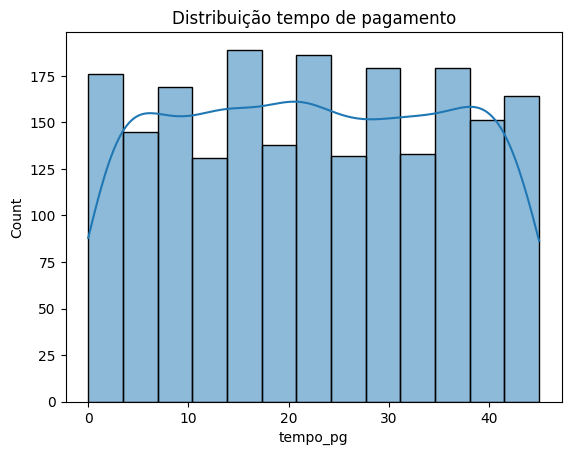

In [ ]:
sns.histplot(data = df.tempo_pg, kde = True)
plt.title('Distribuição tempo de pagamento')

In [ ]:
df.tempo_pg.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: tempo_pg, dtype: float64

Com esta analise percebemos que não existe uma previsibilidade no tempo de pagamento

## Tempo de pagamento por cidade e produto

In [ ]:
df.groupby('loja_cidade').tempo_pg.mean()

loja_cidade
Belo Horizonte    21.430939
Brasília          22.269430
Curitiba          23.550898
Palmas            23.294444
Recife            22.301075
Rio de Janeiro    23.363855
Salvador          21.644860
Santa Catarina    19.769231
São Paulo         23.087432
Vitória           22.710660
Name: tempo_pg, dtype: float64

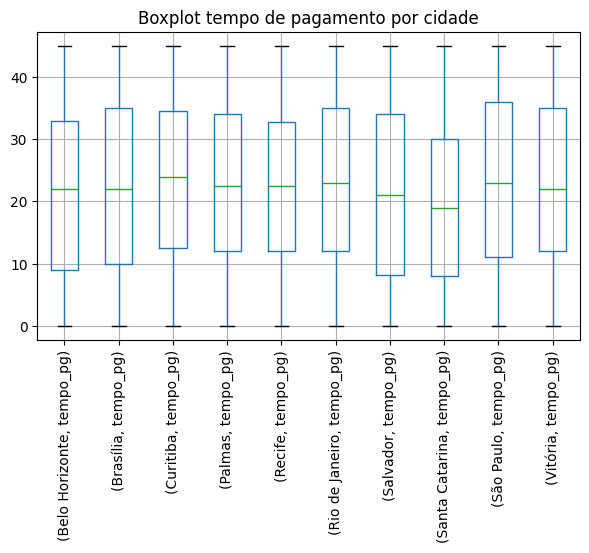

In [ ]:
plt.figure(figsize=(7,4))
df[['loja_cidade','tempo_pg']].groupby('loja_cidade').boxplot('tempo_pg')
plt.title('Boxplot tempo de pagamento por cidade')
plt.xticks(rotation = 90)
plt.show()
#

Não existe diferença significativa de tempo de pagamento entre as cidades

In [ ]:
df.groupby('produto_produto').tempo_pg.mean()

produto_produto
cadeira          23.734513
carregador       22.051724
impressora       21.383459
laptop básico    22.980513
laptop gamer     21.763889
mesa             20.300885
monitor          22.021277
mouse            22.912698
teclado          22.104575
xxx-231a         21.823077
Name: tempo_pg, dtype: float64

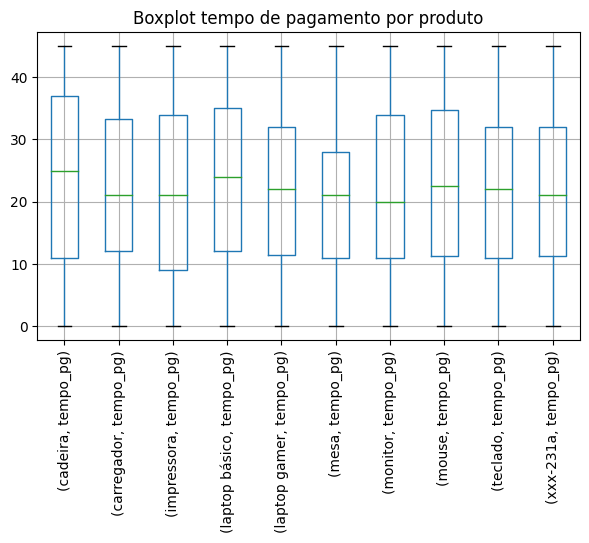

In [ ]:
plt.figure(figsize=(7,4))
df[['produto_produto','tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.title('Boxplot tempo de pagamento por produto')
plt.xticks(rotation = 90)
plt.show()
#

Também não existe relação entre produto e tempo de pagamento

## Sazonalidade por loja

In [ ]:
graf_dados = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()
graf_dados

,produto_valor
dt_venda,
2018-01-04,NaN
2018-01-05,NaN
2018-01-06,NaN
2018-01-07,NaN
2018-01-10,NaN
...,...
2020-09-20,7407.673893
2020-09-22,7635.302720
2020-09-24,7431.969387


In [ ]:
import plotly.express as px
fig = px.line(x=graf_dados.index, y=graf_dados.values.flatten(), width=700, height=400)
fig.show()

é possivel observar uma sazonalidade no meio do ano e no final do ano, mesmo em periodos de poucas vendas

## Vendas por ano

In [ ]:
df['Year'] = df['dt_pgto'].dt.year
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,Year
id,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.0,2018.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.0,2018.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62.0,2018.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0,2020.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,30.0,2020.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,38.0,NaN


In [ ]:
graf_dados = df[['produto_valor','Year']].groupby('Year').sum().produto_valor.sort_values(ascending = False)
graf_dados

Year
2019.0    1.121802e+06
2018.0    1.096182e+06
2020.0    9.351731e+05
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'receita por ano')

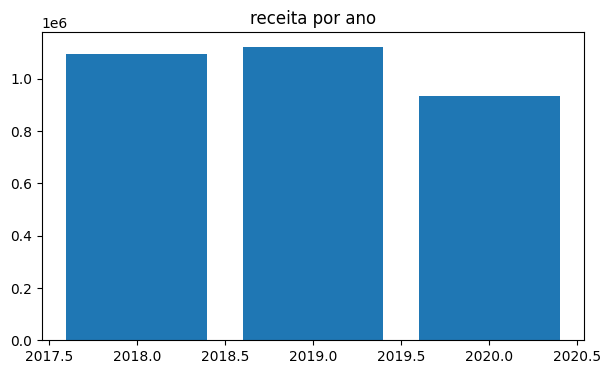

In [ ]:
graf_dados = df[['produto_valor','Year']].groupby('Year').sum()
plt.figure(figsize=(7,4))
plt.bar(graf_dados.index, graf_dados['produto_valor'])
plt.title('receita por ano')

É possivel observar que existe uma queda na receita entre 2019 e 2020

## Tempo de pagamento por promoção

In [ ]:
promo = pd.read_csv('caso_estudo_venda_promocao.csv', sep=";")
promo = promo.set_index('id_venda')
promo

,promoção
id_venda,
1,0
2,1
3,1
4,0
5,0
...,...
2996,0
2997,0
2998,0


In [ ]:

df = df.join(promo.add_prefix('promo_'), on = 'id')
df


,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,Year,promo_promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.0,2018.0,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.0,2018.0,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,62.0,2018.0,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0,NaN,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.0,2018.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0,2020.0,0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,30.0,2020.0,0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,38.0,NaN,0


In [ ]:
graf_dados = df.groupby('promo_promoção').tempo_pg.mean()
graf_dados

promo_promoção
0    17.700555
1    27.686869
Name: tempo_pg, dtype: float64

A diferença de tempo médio de pagamento dos que compram o produto fora da promoção é de cerca de 10 dias a menos do que os que compraram na promoção

#Análise de inadimplência

##Inadimplência por loja

In [ ]:
plt.figure(figsize=(15,5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

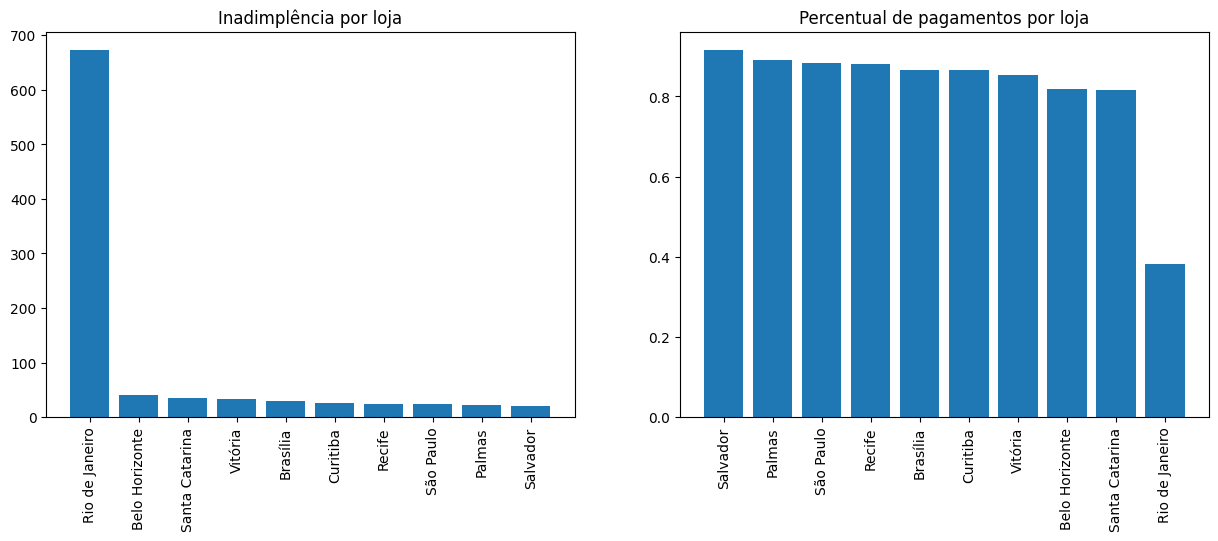

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Inadimplência por loja')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
graf_dados = df.groupby('loja_cidade').pg.mean().sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Percentual de pagamentos por loja')
plt.xticks(rotation=90)

plt.show()

##Inadimplência por produto

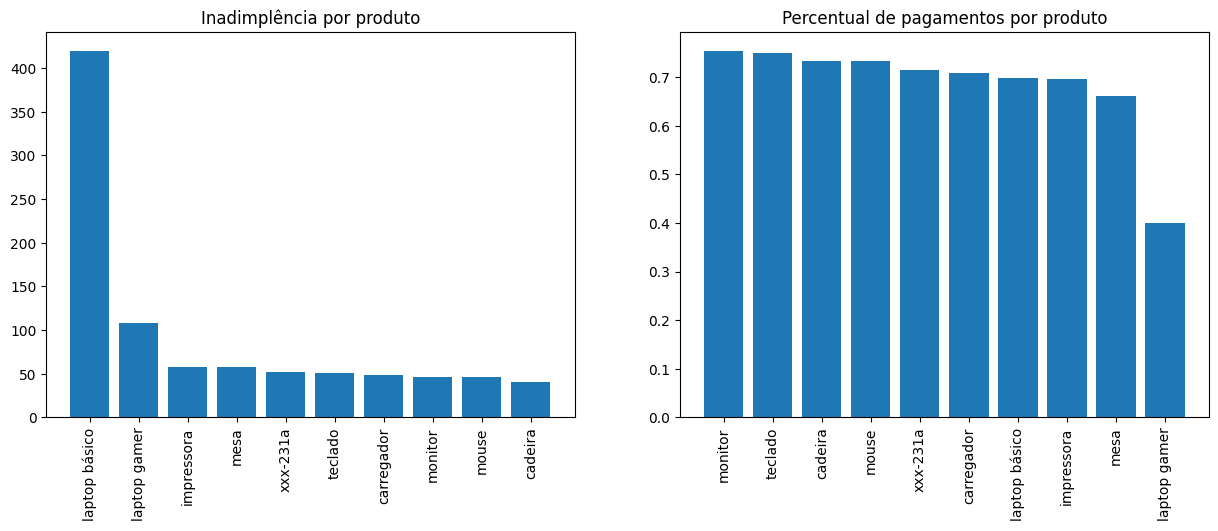

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Inadimplência por produto')
plt.xticks(rotation=90)

plt.subplot( 1,2,2)
graf_dados = df.groupby('produto_produto').pg.mean().sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Percentual de pagamentos por produto')
plt.xticks(rotation=90)

plt.show()

## Inadimplência por receita

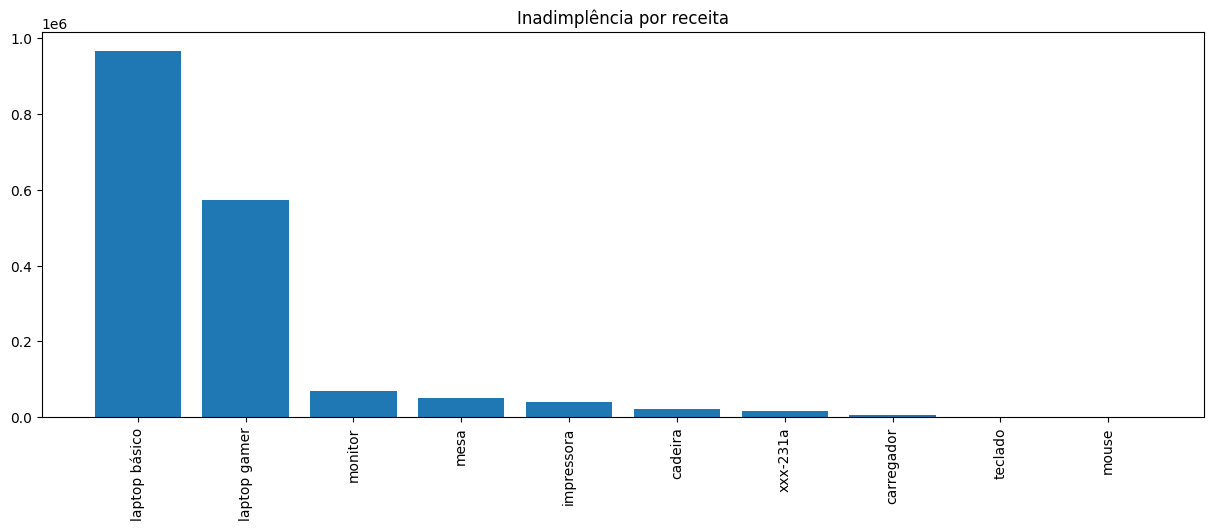

In [ ]:
graf_dados = df[df.pg == 0].groupby('produto_produto')['produto_valor'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Inadimplência por receita')
plt.xticks(rotation=90)
plt.show()

## Inadimplência por idade

Text(0.5, 1.0, 'Inadimplência por idade')

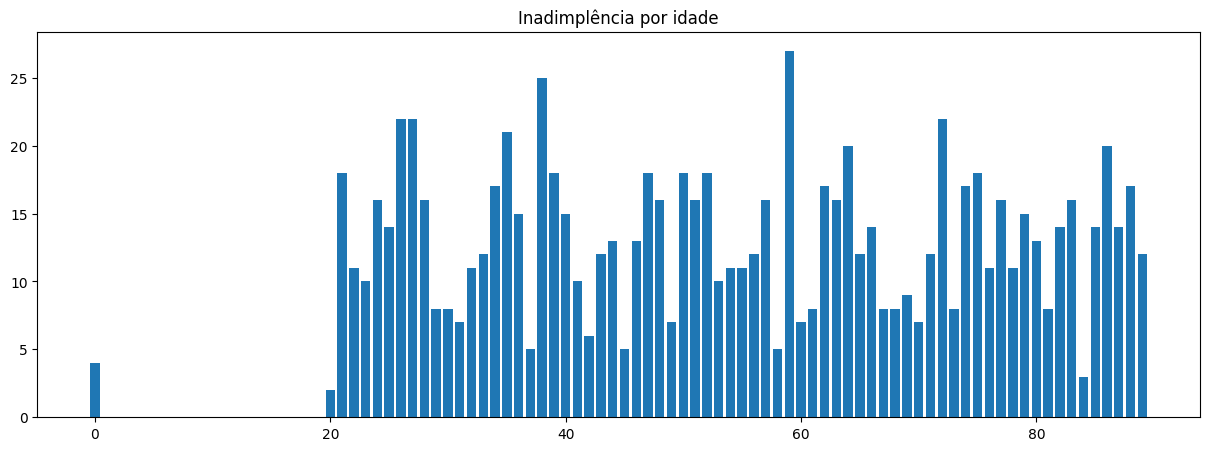

In [ ]:
graf_dados = df[df.pg == 0].groupby('cliente_idade').pg.count()
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Inadimplência por idade')

É possivel observar que a inadimplência é maior entre pessoas de 40 e 60 anos

## Mapa de calor de inadimplência

<Axes: xlabel='loja_cidade', ylabel='produto_produto'>

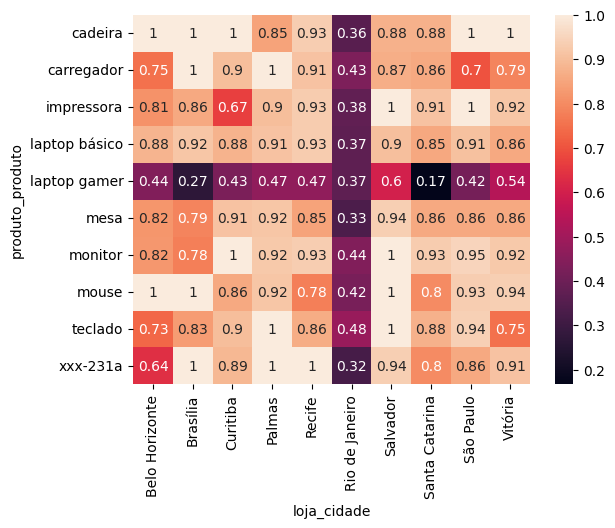

In [ ]:
graf_dados = df.pivot_table(index = 'produto_produto', columns = 'loja_cidade', values = 'pg', aggfunc = 'mean')
sns.heatmap(graf_dados, annot=True)

# Machine Learning



## Conceitos de ML



*   **Definir um alvo** primeiramente. Podendo ser uma coluna ou uma linha do dataset

*   **Normalizar os dados**. Pois o ML trabalha com dados matematicos

*   Cuidados com **dados Categoricos** como cidades, pois as mesmas não podem ser transferidos em dados númericos, e não representam dados crescentes. Cuidado com Sexo também pois ele pode ser transformados em 0 e 1, porém se não forem dados crescentes eles também são dados categoricos

*   **Dados de treinamentos e dados de testes**, geralmente são divididos em 70 e 80% para treinamento, para que o algoritimo aprenda. Os outros 20 a 30% é usado para testar. Isso serve para prever que o algoritmo fique viciado em dados de treinamento. E perfome bem, mesmo com dados que não foram vistos no treinamento.
O nome desse problema é **Overfitting**.

*   Existem 4 tecnicas que são muito importantes

1. **Organizar os dados**, onde precisamos de um **conjunto de dados e um target**. Digamos que existam 3 colunas de dados e um target. O target é o resultado correto das 3 colunas de dados.
Dessa forma quando tivermos um novo dado, possamos estimar o target dele, com base nos dados de entrada

2. Criar o modelo, que geralmente é **model= modelo(parâmetros)**

3. Entrada dos dados, que seria por exemplo **model.fit(X,Y)** onde **X são os dados de entrada**, e o **Y seria o target ou os dados de saida**.

4. Ao fazer isso basta apenas usar o algoritmo, que geralmente é **model.predict(X)** inserindo apenas os dados de entrada

*   **A matriz de confusão** é usado para avaliar o resultado do modelo de ML. Onde se o valor predito for um **verdadeiro positivo ou um verdadeiro negativo**. O modelo está respondendo bem. Caso seja um **Falso Negativo ou um Falso positivo**, ele está respondendo mal.
Com isso é possivel criar metricas como a **precisão e o recall**. A precisão mostra quantos o algoritmo acertou. O recall mostra o quanto o algoritmo capturou. Eles se antagonizam, pois um mede a precisão, e outro a captura dos dados.

## Alvo

In [ ]:
dfML = df[['cliente_sexo','loja_cidade','produto_produto','produto_valor','cliente_idade','promo_promoção','pg']]
dfML = dfML.replace([' ','-'],'_', regex=True)
dfML

,cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promo_promoção,pg
id,,,,,,,
1,M,Palmas,laptop_básico,2300.0,74.0,0,1
2,F,Palmas,laptop_básico,2300.0,52.0,1,1
3,M,Salvador,cadeira,540.0,62.0,1,1
4,M,Belo_Horizonte,laptop_básico,2300.0,82.0,0,0
5,M,Palmas,mouse,20.0,83.0,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,150.0,24.0,0,1
2997,F,Brasília,laptop_básico,2300.0,30.0,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,5300.0,38.0,0,0


##Normalização

In [ ]:
dfML['produto_valor'] = dfML['produto_valor']/dfML['produto_valor'].max()
dfML['cliente_idade'] = dfML['cliente_idade']/dfML['cliente_idade'].max()
dfML

,cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promo_promoção,pg
id,,,,,,,
1,M,Palmas,laptop_básico,0.433962,0.831461,0,1
2,F,Palmas,laptop_básico,0.433962,0.584270,1,1
3,M,Salvador,cadeira,0.101887,0.696629,1,1
4,M,Belo_Horizonte,laptop_básico,0.433962,0.921348,0,0
5,M,Palmas,mouse,0.003774,0.932584,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,0.028302,0.269663,0,1
2997,F,Brasília,laptop_básico,0.433962,0.337079,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,1.000000,0.426966,0,0


## Dados categoricos

In [ ]:
col_cat = ['cliente_sexo','loja_cidade','produto_produto','promo_promoção']
dfML_dummies = pd.get_dummies(dfML[col_cat].astype(str), drop_first=False, dtype=float)
dfML_dummies

,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,loja_cidade_Rio_de_Janeiro,loja_cidade_Salvador,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promo_promoção_0,promo_promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
dfML = pd.concat([dfML,dfML_dummies], axis = 1)
dfML = dfML.drop(col_cat, axis = 1)
dfML

,produto_valor,cliente_idade,pg,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promo_promoção_0,promo_promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,0.433962,0.831461,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.433962,0.584270,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.101887,0.696629,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.433962,0.921348,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.003774,0.932584,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.028302,0.269663,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2997,0.433962,0.337079,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2998,1.000000,0.426966,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from re import X
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, auc

y= dfML.pg
X = dfML.drop('pg', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_new = X.loc[[2997,2998]]
X_new

,produto_valor,cliente_idade,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promo_promoção_0,promo_promoção_1
id,,,,,,,,,,,,,,,,,,,,,
2997,0.433962,0.337079,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2998,1.000000,0.426966,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modelos Regressão Linear e Regressão Logistica

Uma **regressão linear** é uma técnica de análise de dados que prevê o valor de dados desconhecidos usando outro valor de dados relacionado e conhecido. Ele modela matematicamente a variável desconhecida ou dependente e a variável conhecida ou independente como uma equação linear. Por exemplo, suponha que você tenha dados sobre suas despesas e receitas do ano passado. As técnicas de regressão linear analisam esses dados e determinam que suas despesas são metade de sua renda. Eles então calculam uma despesa futura desconhecida reduzindo pela metade uma renda futura conhecida. Recomendado para saida de dados continuas.



A regressão logística é uma técnica de análise de dados que usa matemática para encontrar as relações entre dois fatores de dados. Em seguida, essa relação é usada para prever o valor de um desses fatores com base no outro. A previsão geralmente tem um número finito de resultados, como sim ou não.
Por exemplo, digamos que você deseje adivinhar se o visitante do seu site clicará no botão de finalização de compra no carrinho de compras ou não. A análise de regressão logística analisa o comportamento anterior do visitante, como o tempo gasto no site e o número de itens no carrinho. Ela determina que, anteriormente, se os visitantes passassem mais de cinco minutos no site e adicionassem mais de três itens ao carrinho, eles clicavam no botão de finalização de compra. Usando essas informações, a função de regressão logística pode prever o comportamento de um novo visitante do site.
Recomendado quando a saida de dados é binária


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

all_col_with_plus = '+'.join(dfML.drop(['pg'],axis = 1).columns)
modelo = smf.glm(formula = 'pg ~ ' + all_col_with_plus, data = dfML, family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     pg   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2977
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.6
Date:                Tue, 17 Sep 2024   Deviance:                       2677.1
Time:                        15:21:27   Pearson chi2:                 3.01e+03
No. Iterations:                    27   Pseudo R-squ. (CS):             0.2916
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
model = LogisticRegression(penalty='none', solver = 'newton-cg')
model.fit(X_train, y_train)

print('- Matriz de confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n Reporte Completo')
print(classification_report(y_test, model.predict(X_test)))
print('\n Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de confusão
[[180 115]
 [ 76 529]]

 Reporte Completo
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       295
           1       0.82      0.87      0.85       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900


 Reporte teste
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       295
           1       0.82      0.87      0.85       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



In [ ]:
model.predict(X_new)

array([1, 0])

##Árvore de decisão

Árvores de Decisão são modelos que tentam fazer previsões tomando decisões baseadas em regras que são criadas pelo próprio algoritmo. Essas regras são criadas a partir de features que o modelo julga serem as mais importantes para a tomada de decisão.

Se formos olhar para a estrutura de uma árvore de decisão, ela é composta por 3 elementos: Nós, Arestas e Folhas. Abaixo, vou explicar o que são eles.

**Nós**: Cada nó é uma junção de uma ou mais arestas. Eles são responsáveis por aplicar as regras de decisão.

**Arestas**: São as linhas que conectam um nó a outro.

**Folhas**: São os nós que não têm nenhuma aresta saindo deles. Em Machine Learning, as folhas são os resultados da nossa previsão.


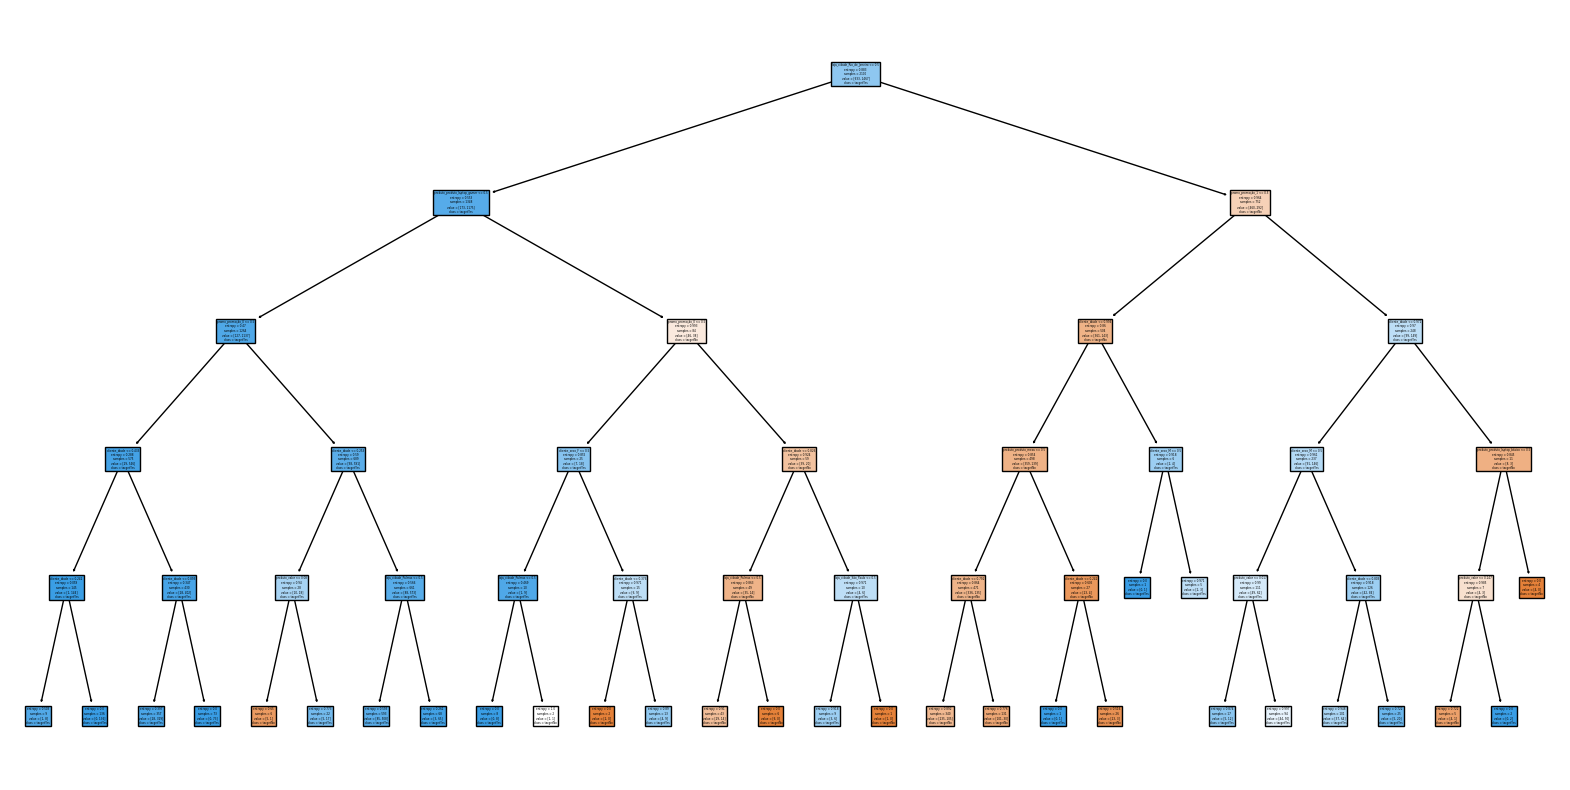

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model = model.fit(X_train, y_train)
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(model, feature_names=X_train.columns, class_names = ['targetNo', 'targetYes'], filled=True)

In [ ]:
print('- Matriz de confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n Reporte Completo')
print(classification_report(y_test, model.predict(X_test)))
print('\n Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de confusão
[[184 111]
 [ 82 523]]

 Reporte Completo
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       295
           1       0.82      0.86      0.84       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900


 Reporte teste
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       295
           1       0.82      0.86      0.84       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



In [ ]:
model.predict(X_new)

array([1, 0])

## Redes Neurais

É uma tecnica de ML, (perception) onde existem alguns dados em neuroniosde dados, e ligações a um função de ativação, e uma saida.

In [ ]:
from keras import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf
tf.random.set_seed(2)

model = Sequential()
model.add(Dense(15, activation = 'relu',kernel_initializer = 'random_normal', input_dim = len(X_train.columns)))
model.add(Dense(7, activation = 'relu',kernel_initializer = 'random_normal', input_dim = len(X_train.columns)))
model.add(Dense(3, activation = 'relu',kernel_initializer = 'random_normal', input_dim = len(X_train.columns)))
model.add(Dense(3, activation = 'relu',kernel_initializer = 'random_normal', input_dim = len(X_train.columns)))
model.add(Dense(1, activation = 'sigmoid',kernel_initializer = 'random_normal'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 300, verbose = False)

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")  # Assuming binary classification

print('- Matriz de confusão')
print(confusion_matrix(y_test, y_pred_classes))
print('\n Reporte Completo')
print(classification_report(y_test, y_pred_classes))
print('\n Reporte teste')
print(classification_report(y_test, y_pred_classes))


29/29 [==============================] - 0s 2ms/step
- Matriz de confusão
[[  0 295]
 [  0 605]]

 Reporte Completo
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       295
           1       0.67      1.00      0.80       605

    accuracy                           0.67       900
   macro avg       0.34      0.50      0.40       900
weighted avg       0.45      0.67      0.54       900


 Reporte teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       295
           1       0.67      1.00      0.80       605

    accuracy                           0.67       900
   macro avg       0.34      0.50      0.40       900
weighted avg       0.45      0.67      0.54       900



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

In [ ]:
model.predict(X_new)

1/1 [==============================] - 0s 27ms/step


array([[0.6991014],
       [0.6991014]], dtype=float32)

##XGBoost

Tecnica que combina outras tecnicas de arvores de decisão. Como se tivessemos vŕias arvore de decisões simples analisando pequenos pontos do código, criando assim um algoritmo composto de sub-algoritmos.

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print('- Matriz de confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n Reporte Completo')
print(classification_report(y_test, model.predict(X_test)))
print('\n Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de confusão
[[192 103]
 [ 93 512]]

 Reporte Completo
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       295
           1       0.83      0.85      0.84       605

    accuracy                           0.78       900
   macro avg       0.75      0.75      0.75       900
weighted avg       0.78      0.78      0.78       900


 Reporte teste
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       295
           1       0.83      0.85      0.84       605

    accuracy                           0.78       900
   macro avg       0.75      0.75      0.75       900
weighted avg       0.78      0.78      0.78       900



In [ ]:
model.predict(X_new)

array([1, 0])

# Framework de trabalho

## Analises

1. Entenda o contexto do problema
2. Extraia os dados
3. Data Cleaning
4. Data Fusion
5. Feature Engineering
6. Gere perguntas
7. Interaja e Visualize (gáficos e tabelas simples que sejam faceis de ler)

Ache informações e tire ideias

##Machine Learning

1. Criar a base com dados relevantes
2. Definir ou criar uma coluna alvo (target)
3. Normalizar os dados
4. Tratar os dados categóricos
5. Separar base treino e teste
6. Testar os modelos de ML

Gerar métricas!